In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import time
import random
import os

In [2]:
import tensorflow

In [3]:
os.listdir('./data/raw')

['A74_A16_10YPL-AREA-----S_201901012300_201901312300.csv',
 'A69_A01_10YPL-AREA-----S_201901012300_201901312300.csv',
 '.ipynb_checkpoints']

In [4]:
raw_dataset = pd.read_csv('./data/raw/A74_A16_10YPL-AREA-----S_201901012300_201901312300.csv')

# 1. Preprocessing

Quick check of the data and preparing for both Sklearn and Tensorflow.

#TODO: distinguish between solar and wind, make it nicer.

In [7]:
raw_dataset = raw_dataset.rename(columns = {
    'Unnamed: 0': 'Time',
    '0': 'Value'
})

raw_dataset.head()

,Time,Value
0,2019-01-02 00:00:00+00:00,215
1,2019-01-02 01:00:00+00:00,217
2,2019-01-02 02:00:00+00:00,217
3,2019-01-02 03:00:00+00:00,217
4,2019-01-02 04:00:00+00:00,217


In [8]:
raw_dataset['Time'] = pd.to_datetime(raw_dataset.Time)

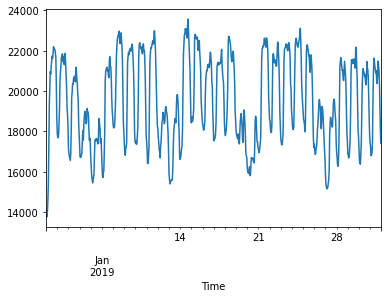

In [10]:
raw_dataset.groupby(['Time'])['Value'].sum().plot()

In [47]:
# Function - making a dataset out of certain number of hours used for training and which hour to choose for prediction
def make_tsa(dataset, hours_training, hours_predict):
    """
    
    """
    # 
    training_col = list(range(hours_training))
    training_col.append('y')
    
    # 
    final_dataset = pd.DataFrame(columns = (training_col))
    
    # 
    for i in range((dataset.shape[0] - hours_training - hours_predict)):
        final_dataset.loc[i,training_col[:-1]] = dataset.iloc[i:(hours_training+i)].reset_index().Value
        final_dataset.loc[i,training_col[-1]] = dataset.iloc[(hours_training + hours_predict + i - 1)]
    
    return final_dataset
    

In [48]:
HOURS_TRAINING = 48
HOURS_PREDICT = 1

final_dataset = make_tsa(raw_dataset.Value, HOURS_TRAINING, HOURS_PREDICT)
final_dataset

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,y
0,215,217,217,217,217,217,217,229,254,243,...,254,232,191,188,189,220,255,228,218,247
1,217,217,217,217,217,217,229,254,243,251,...,232,191,188,189,220,255,228,218,247,251
2,217,217,217,217,217,229,254,243,251,253,...,191,188,189,220,255,228,218,247,251,251
3,217,217,217,217,229,254,243,251,253,253,...,188,189,220,255,228,218,247,251,251,248
4,217,217,217,229,254,243,251,253,253,253,...,189,220,255,228,218,247,251,251,248,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,1068,1042,906,701,618,546,479,447,468,405,...,592,555,459,381,389,401,337,363,406,424
7147,1042,906,701,618,546,479,447,468,405,361,...,555,459,381,389,401,337,363,406,424,526
7148,906,701,618,546,479,447,468,405,361,447,...,459,381,389,401,337,363,406,424,526,604
7149,701,618,546,479,447,468,405,361,447,634,...,381,389,401,337,363,406,424,526,604,652


In [78]:
final_dataset.sort_values('y')

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,y
5954,0,0,0,0,0,0,0,0,0,0,...,43,30,4,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,28,28,4,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,28,28,28,4,0,0,0,0,0,0
5995,4,0,0,0,0,0,0,0,0,0,...,29,28,28,28,4,0,0,0,0,0
5994,30,4,0,0,0,0,0,0,0,0,...,25,29,28,28,28,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3378,12985,12704,12364,11634,11299,11221,10747,10731,10636,10648,...,13611,13429,13378,13405,13339,13195,13221,13450,13392,13498
3298,10111,10317,10218,10089,9663,9532,10280,10698,10524,10213,...,9598,9648,9939,10256,10734,11699,12960,13282,13413,13505
3368,13326,13100,12708,12766,12746,12755,12530,12563,12828,13084,...,11451,11297,11257,11193,11198,11112,11530,12156,13275,13516
3392,13044,12948,13055,13190,13196,13217,13144,13026,12944,13145,...,11936,11553,11446,11333,11384,11268,11555,12312,13139,13557


In [77]:
difference_ds = pd.DataFrame(columns = training_col[1:])

for i in range(final_dataset.shape[1] - 1):
    difference_ds.loc[:,i+1] = (final_dataset.iloc[:,i+1] - final_dataset.iloc[:,i])
    
difference_ds = difference_ds.drop(['y'], axis = 1).rename(columns = {
    48: 'y'
})

difference_ds

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,y
0,2,0,0,0,0,0,12,25,-11,8,...,-4,-22,-41,-3,1,31,35,-27,-10,29
1,0,0,0,0,0,12,25,-11,8,2,...,-22,-41,-3,1,31,35,-27,-10,29,4
2,0,0,0,0,12,25,-11,8,2,0,...,-41,-3,1,31,35,-27,-10,29,4,0
3,0,0,0,12,25,-11,8,2,0,0,...,-3,1,31,35,-27,-10,29,4,0,-3
4,0,0,12,25,-11,8,2,0,0,0,...,1,31,35,-27,-10,29,4,0,-3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,-26,-136,-205,-83,-72,-67,-32,21,-63,-44,...,-82,-37,-96,-78,8,12,-64,26,43,18
7147,-136,-205,-83,-72,-67,-32,21,-63,-44,86,...,-37,-96,-78,8,12,-64,26,43,18,102
7148,-205,-83,-72,-67,-32,21,-63,-44,86,187,...,-96,-78,8,12,-64,26,43,18,102,78
7149,-83,-72,-67,-32,21,-63,-44,86,187,186,...,-78,8,12,-64,26,43,18,102,78,48


In [87]:
checking = 3552
raw_dataset.iloc[(checking-10+48):(checking+10+48)]

,Time,Value
3590,2019-01-31 14:00:00+00:00,11918
3591,2019-01-31 15:00:00+00:00,11829
3592,2019-01-31 16:00:00+00:00,12009
3593,2019-01-31 17:00:00+00:00,12405
3594,2019-01-31 18:00:00+00:00,12203
3595,2019-01-31 19:00:00+00:00,11993
3596,2019-01-31 20:00:00+00:00,11557
3597,2019-01-31 21:00:00+00:00,11033
3598,2019-01-31 22:00:00+00:00,10521
3599,2019-01-31 23:00:00+00:00,10196


In [84]:
difference_ds.sort_values('y')

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,y
3552,-171,-50,-83,87,177,562,788,282,54,-46,...,-89,180,396,-202,-210,-436,-524,-512,-325,-9992
1392,-317,-96,107,478,262,738,332,306,203,-14,...,-44,112,164,4,-41,-278,-751,-448,-190,-4722
695,-2,-1,0,-3,2,9,19,5,0,-1,...,-15,81,14,27,51,-26,5,-15,-313,-1267
1174,-214,-292,-244,2,0,-189,-167,784,650,140,...,0,-85,-93,104,66,26,-258,-260,-347,-1148
862,-326,107,-35,-102,-48,382,695,538,557,18,...,-1,-28,5,11,10,27,-223,-153,-418,-1123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,351,494,360,206,-99,-129,-426,-131,748,418,...,30,-76,283,35,50,291,317,478,965,1261
991,296,497,435,56,31,136,-157,-252,589,71,...,-468,-444,-3,181,-135,26,30,183,768,1424
672,-3,2,-1,2,0,11,18,1,-3,-1,...,1,3,-10,6,1,-8,-5,-9,-34,1676
6432,0,0,0,0,0,0,0,0,50,7,...,0,25,4,0,-38,-5,0,0,0,4394


In [49]:
SPLIT_TIME = 5000

train_ds = final_dataset.iloc[:SPLIT_TIME, :]
valid_ds = final_dataset.iloc[SPLIT_TIME:, :]

In [53]:
# shuffle train dataset so that training is not biased
train_ds.shape[0]

5000

# 2. RF - absolute values

This one will be about forecasting absolute values of generation for couple of hours based on previous hours (such as 2-3 days).

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.

In [54]:
# TODO: Check pipeline of Classification of Frauds

# define grid search for RF
# define pipeline (scaling, feature_selection)

Add more variables and feature engineering:
- holidays,
- hour, 
- day?,
- 